# 1. Business Understanding
## Objective
The goal of this project is to analyze 90 days of Binance trade data from multiple accounts and rank them based on financial performance.

## Key Questions to Answer
- Which accounts are the most profitable? (PnL + , ROI + )
- Which accounts have the best risk-adjusted returns? (Sharpe Ratio + )
- Which accounts experienced the least drawdown? (MDD - )
- Which accounts have the best consistency? (Win Rate + , Total Positions + )






# Load the dataset

In [1]:
import ast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



In [2]:
file_path = "TRADES_CopyTr_90D_ROI.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

In [3]:
df

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


# 2. Data Understanding


- time: Trade timestamp (convert to datetime).
- symbol: Traded asset (e.g., BTCUSDT).
- side: BUY/SELL action.
- price: Execution price.
- quantity: Money involved in the trade.
- realizedProfit: Profit/loss from the trade.

### Check column names

In [4]:
print(" Column Names:")
print(df.columns)

 Column Names:
Index(['Port_IDs', 'Trade_History'], dtype='object')


In [5]:
print(" Dataset Info:")
print(df.info())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Port_IDs       150 non-null    int64 
 1   Trade_History  149 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
None


In [6]:
print(" First 5 Rows:")
print(df.head())

 First 5 Rows:
              Port_IDs                                      Trade_History
0  3925368433214965504  [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1  4002413037164645377  [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2  3923766029921022977  [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
3  3994879592543698688  [{'time': 1718678214000, 'symbol': 'ETHUSDT', ...
4  3926423286576838657  [{'time': 1718979615000, 'symbol': 'ETHUSDT', ...


In [7]:
# Checking the first few non-null values in the 'Trade_History' column
df["Trade_History"].dropna().head(5).tolist()

["[{'time': 1718899656000, 'symbol': 'SOLUSDT', 'side': 'BUY', 'price': 132.537, 'fee': -0.9940275, 'feeAsset': 'USDT', 'quantity': 1988.055, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'SOL', 'qty': 15.0, 'positionSide': 'LONG', 'activeBuy': True}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.27979617, 'feeAsset': 'USDT', 'quantity': 1398.98088, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 11484.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.03949404, 'feeAsset': 'USDT', 'quantity': 197.47022, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 1621.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899616000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.0082837

In [8]:
df.duplicated().sum()


np.int64(0)


### Check for missing values

In [9]:
print(" Missing Values:")
print(df.isnull().sum())

 Missing Values:
Port_IDs         0
Trade_History    1
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
print(df.isnull().sum())

Port_IDs         0
Trade_History    0
dtype: int64


In [12]:
key_columns = ["Port_IDs", "Trade_History", ]
print(" Sample Values of Key Columns:")
for col in key_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].sample(5))      # Show 5 random values frrm the data set
    else:
        print(f"\n Column '{col}' not found in dataset.") # if the column is not found in the dataset

 Sample Values of Key Columns:

Port_IDs:
134    3910983669796782848
131    3826087012661391104
16     4031181049693676544
6      4030395639953224449
109    4039279455324236544
Name: Port_IDs, dtype: int64

Trade_History:
87     [{'time': 1718985208000, 'symbol': 'BTCUSDT', ...
137    [{'time': 1718963138000, 'symbol': 'ENSUSDT', ...
147    [{'time': 1718984241000, 'symbol': 'BTCUSDT', ...
115    [{'time': 1718745605000, 'symbol': 'BTCUSDT', ...
72     [{'time': 1718986755000, 'symbol': '1000PEPEUS...
Name: Trade_History, dtype: object


# 3. Data Preparation

In [13]:
# Load dataset
file_path = "TRADES_CopyTr_90D_ROI.csv"
df = pd.read_csv(file_path)

In [14]:
# Function to parse Trade_History
def parse_trade_history(trade_history):
    try:
        trades = ast.literal_eval(trade_history)   #Convert string to list of dicts
        parsed_trades = []
        
        # Convert timestamp

        for trade in trades:
            parsed_trades.append({
                "time": pd.to_datetime(trade.get("time", None), unit="ms"),  # Converts the timestamp (in milliseconds) to a readable datetime format.
                "symbol": trade.get("symbol", None), # The trading pair (e.g., BTC/USDT).
                "side": trade.get("side", None), #  Whether the trade was a BUY or SELL.
                "price": trade.get("price", 0), # Price at which the trade was executed.
                "quantity": trade.get("quantity", 0), # Amount of money or assets involved.
                "realizedProfit": trade.get("realizedProfit", 0)  # Extract profit/loss
            })
        
        return parsed_trades
    except Exception as e:
        print(f"Error parsing: {trade_history}\n{e}")  # If parsing fails, it prints an error message and returns an empty list.

        return []

In [15]:

# Apply function to parse Trade_History

df["Parsed_Trades"] = df["Trade_History"].apply(parse_trade_history)

Error parsing: nan
malformed node or string: nan



- df_final.to_csv("Parsed_Trade_History.csv", index=False)
-  print("Parsed trade history saved to 'Parsed_Trade_History.csv'.")

In [16]:
for col in df.columns:
    print(f"Column: '{col}'") 


Column: 'Port_IDs'
Column: 'Trade_History'
Column: 'Parsed_Trades'


In [17]:
print(df["Trade_History"].head(3))  
print(df["Trade_History"].dtype)     


0    [{'time': 1718899656000, 'symbol': 'SOLUSDT', ...
1    [{'time': 1718980078000, 'symbol': 'NEARUSDT',...
2    [{'time': 1718677164000, 'symbol': 'ETHUSDT', ...
Name: Trade_History, dtype: object
object


In [18]:
# Explode the list of trades into separate rows
df_exploded = df.explode("Parsed_Trades").reset_index(drop=True)

- The Parsed_Trades column contains lists. Since we want one trade per row, we explode the lists into individual rows.
- reset_index(drop=True): Resets the index after exploding, removing old index numbers.

In [19]:
# Convert dictionary in "Parsed_Trades" column to separate columns
df_final = pd.json_normalize(df_exploded["Parsed_Trades"])


- df_exploded["Parsed_Trades"] contains dictionaries with trade details.
- pd.json_normalize() extracts the values from these dictionaries and turns them into separate columns.

In [20]:
# Combine with Port_IDs
df_final["Port_IDs"] = df_exploded["Port_IDs"]


- Adds the Port_IDs column back to the exploded data so that trades remain associated with their respective accounts.

In [21]:
# Show sample parsed data
print(" Parsed Trade History:")
print(df_final.head())


# Displays the first few rows of the cleaned trade history.


 Parsed Trade History:
                 time    symbol side      price    quantity  realizedProfit  \
0 2024-06-20 16:07:36   SOLUSDT  BUY  132.53700  1988.05500             0.0   
1 2024-06-20 16:06:58  DOGEUSDT  BUY    0.12182  1398.98088             0.0   
2 2024-06-20 16:06:58  DOGEUSDT  BUY    0.12182   197.47022             0.0   
3 2024-06-20 16:06:56  DOGEUSDT  BUY    0.12182    16.56752             0.0   
4 2024-06-20 16:06:56  DOGEUSDT  BUY    0.12182    92.21774             0.0   

              Port_IDs  
0  3925368433214965504  
1  3925368433214965504  
2  3925368433214965504  
3  3925368433214965504  
4  3925368433214965504  


In [22]:
# Save cleaned data for further analysis
df_final.to_csv("Parsed_Trade_History.csv", index=False)
print("Parsed trade history saved to 'Parsed_Trade_History.csv'.")

Parsed trade history saved to 'Parsed_Trade_History.csv'.


- Saves the cleaned and structured trade history as a new CSV file (Parsed_Trade_History.csv).
- index=False: Excludes the index column in the saved file.

# 4. Modelling
 

#### Now that we have a structured dataset, we can move on to financial metric calculations like:

- ROI
- PnL
- Sharpe Ratio
- Maximum Drawdown (MDD)
- Win Rate
- Account Ranking

## Metrics to Compute

Here’s the corrected table without LaTeX formatting:  

| **Metric** | **Definition** | **Formula** |  
|------------|--------------|------------|  
| **ROI (Return on Investment)** | Measures return relative to initial investment | (Final Value − Initial Value) / Final Value |  
| **PnL (Profit and Loss)** | Total profit/loss over 90 days | Sum of realizedProfit |  
| **Sharpe Ratio** | Risk-adjusted return | (Mean Daily Returns − Risk-Free Rate) / Std Dev of Returns |  
| **MDD (Maximum Drawdown)** | Max loss from peak | (Peak Value − Trough Value) / Peak Value |  
| **Win Rate** | Percentage of profitable trades | Win Positions / Total Positions |  
| **Win Positions** | Number of trades with positive profit | Count of realizedProfit > 0 |  
| **Total Positions** | Total number of trades | Count of all trades |

In [23]:
import pandas as pd
import numpy as np


file_path = "Parsed_Trade_History.csv"
df = pd.read_csv(file_path)


df["time"] = pd.to_datetime(df["time"], errors="coerce")            # 'time'----> datetime format


df.dropna(subset=["realizedProfit", "quantity", "price"], inplace=True)

df["realizedProfit"] = pd.to_numeric(df["realizedProfit"], errors="coerce")   # Ensure numerical values are properly formatted
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")


df = df[(df["quantity"] > 0) & (df["price"] > 0)]               # Filter out invalid trades (zero or negative quantity/price)


df["investment"] = df["quantity"] * df["price"]                 # Calculate total investment per trade (assuming quantity * price)

def calculate_metrics(group):
    total_pnl = group["realizedProfit"].sum()           # Group by Port_IDs to calculate financial metrics
    total_investment = group["investment"].sum()
    total_trades = len(group)
    
    
    roi = (total_pnl / total_investment) * 100 if total_investment > 0 else 0           # Avoid division by zero
    
    win_trades = group[group["realizedProfit"] > 0].shape[0]
    
    win_rate = (win_trades / total_trades) * 100 if total_trades > 0 else 0
    
    
    cumulative_returns = group["realizedProfit"].cumsum()           # Maximum Drawdown (MDD) Calculation
    rolling_max = cumulative_returns.cummax()
    drawdown = rolling_max - cumulative_returns
    max_drawdown = drawdown.max()

    
    mean_return = group["realizedProfit"].mean()                    # Sharpe Ratio Calculation
    std_dev = group["realizedProfit"].std()
    sharpe_ratio = mean_return / std_dev if std_dev > 0 else 0
    
    return pd.Series({
        "Total_PnL": total_pnl,
        "ROI": roi,
        "Win_Rate": win_rate,
        "Win_Positions": win_trades,
        "Total_Positions": total_trades,
        "Sharpe_Ratio": sharpe_ratio,
        "Max_Drawdown": max_drawdown
    })


df_metrics = df.groupby("Port_IDs").apply(calculate_metrics).reset_index()      # Applying  the function to each Port_IDs

# Save the results
df_metrics.to_csv("Trading_Metrics.csv", index=False)
print("\n✅ Trading metrics saved to 'Trading_Metrics.csv'.")
print(df_metrics.head()) 



✅ Trading metrics saved to 'Trading_Metrics.csv'.
              Port_IDs    Total_PnL       ROI   Win_Rate  Win_Positions  \
0  3672754654734989568   566.597660  0.000061  44.303797          210.0   
1  3733192481840423936  2923.977200  0.000005  80.261248          553.0   
2  3768170840939476993   243.668899  0.042017  42.857143            6.0   
3  3784403294629753856  2521.814305  0.000716  30.231405         1829.0   
4  3786761687746711808   205.021400  0.000007  45.121951           37.0   

   Total_Positions  Sharpe_Ratio  Max_Drawdown  
0            474.0      0.185274     80.777037  
1            689.0      0.060265   2743.120000  
2             14.0      0.424277      0.000000  
3           6050.0      0.106585    271.291981  
4             82.0      0.215150    123.460267  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14988\292752844.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_metrics = df.groupby("Port_IDs").apply(calculate_metrics).reset_index()      # Applying  the function to each Port_IDs


NOTE POINTS :
| No. | Metric/Step                              | Description |
|----|-------------------------------------------|---------------------------------------------------------------|
| 1  | total_investment                          | Calculates how much money was invested in trades (price * quantity). |
| 2  | total_profit                              | Sums up the realized profit across all trades. |
| 3  | ROI (Return on Investment)                | Measures the percentage return relative to the total investment. |
| 4  | PnL (Profit and Loss)                     | Represents the net profit or loss. |
| 5  | Win Rate                                  | Calculates the percentage of trades that were profitable. |
| 6  | win_positions                             | Number of profitable trades. |
| 7  | total_positions                           | Total trades made by an account. |
| 8  | Sharpe Ratio                              | Measures the risk-adjusted return (higher is better). |
| 9  | Maximum Drawdown (MDD)                    | Captures the largest loss an account suffered from peak to lowest point. |
| 10 | Trade Grouping                            | Groups trades by Port_IDs (unique account identifiers). |

Computes financial metrics for each account.


##### Ranks accounts based on a weighted scoring system:
##### ROI (40%)
##### Sharpe Ratio (30%)
##### Win Rate (20%)
##### MDD (-10%) (negative weight because lower drawdown is better)

## ranking formula:


#  Score=(ROI×0.4)+(SharpeRatio×0.3)+(WinRate×0.2)+(−MDD×0.1)
. This looks good, but we can make it more robust by:
- Normalizing the values before weighting to avoid bias from large numbers.
- Ensuring fair distribution of scores across accounts.

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


file_path = "Trading_Metrics.csv"
df = pd.read_csv(file_path)


weights = {
    "ROI": 0.3,  
    "Total_PnL": 0.2,               # Define weights for ranking (can be adjusted) all are should be postive expect Max_Drawdown
    "Win_Rate": 0.15,  
    "Win_Positions": 0.1,  
    "Total_Positions": 0.1,  
    "Sharpe_Ratio": 0.1,  
    "Max_Drawdown": -0.05  
}

# Normalize the metrics using Min-Max scaling (0 to 1)
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])


df["Score"] = (
    normalized_df["ROI"] * weights["ROI"] +               # Calculate score based on weighted sum of normalized metrics
    normalized_df["Total_PnL"] * weights["Total_PnL"] +
    normalized_df["Win_Rate"] * weights["Win_Rate"] +
    normalized_df["Win_Positions"] * weights["Win_Positions"] +
    normalized_df["Total_Positions"] * weights["Total_Positions"] +
    normalized_df["Sharpe_Ratio"] * weights["Sharpe_Ratio"] +
    normalized_df["Max_Drawdown"] * weights["Max_Drawdown"]
)


df = df.sort_values(by="Score", ascending=False)        # Rank accounts based on score (descending order) form highest to lowest


top_20_accounts = df.head(20)           # Select top 20 accounts


df.to_csv("Ranked_Trading_Accounts.csv", index=False)
top_20_accounts.to_csv("Top_20_Trading_Accounts.csv", index=False)

print("Ranked accounts saved to 'Ranked_Trading_Accounts.csv'.")
print("Top 20 accounts saved to 'Top_20_Trading_Accounts.csv'.")
print(top_20_accounts)


Ranked accounts saved to 'Ranked_Trading_Accounts.csv'.
Top 20 accounts saved to 'Top_20_Trading_Accounts.csv'.
                Port_IDs     Total_PnL        ROI   Win_Rate  Win_Positions  \
58   3977234346014419201   2427.292831  36.530497  39.759036           33.0   
75   3999240873283311617  42574.473679   0.099811  52.321981         2366.0   
62   3986814617275053313  16337.461881   0.092214  78.221722         2780.0   
96   4020204877254599680  71998.855953   0.000005  32.942149         1993.0   
100  4022641794255717633   2176.833824   0.348445  43.522802         2634.0   
37   3944088772635000577   7581.491983   0.000218  45.752928         2774.0   
17   3907081197088384000  18015.997370   0.038348  61.397148         2540.0   
15   3887577207880438784   2417.514037   0.005286  47.818182         2893.0   
27   3931992636670880512  10374.965290   0.000680  40.165289         2430.0   
48   3956076827719377409  16790.012238   0.000259  51.557712         2019.0   
33   39399252750390

#### ✔ How Ranking Works?

- We apply a weighted formula to assign scores:
Score=(ROI×0.4)+(Sharpe Ratio×0.3)+(Win Rate×0.2)+(−MDD×0.1)
- Accounts are sorted in descending order based on the final ranking Score.

In [25]:
print(df.isnull().sum())  


Port_IDs           0
Total_PnL          0
ROI                0
Win_Rate           0
Win_Positions      0
Total_Positions    0
Sharpe_Ratio       0
Max_Drawdown       0
Score              0
dtype: int64


In [26]:
print(df.columns)


Index(['Port_IDs', 'Total_PnL', 'ROI', 'Win_Rate', 'Win_Positions',
       'Total_Positions', 'Sharpe_Ratio', 'Max_Drawdown', 'Score'],
      dtype='object')


# 5. Evaluation

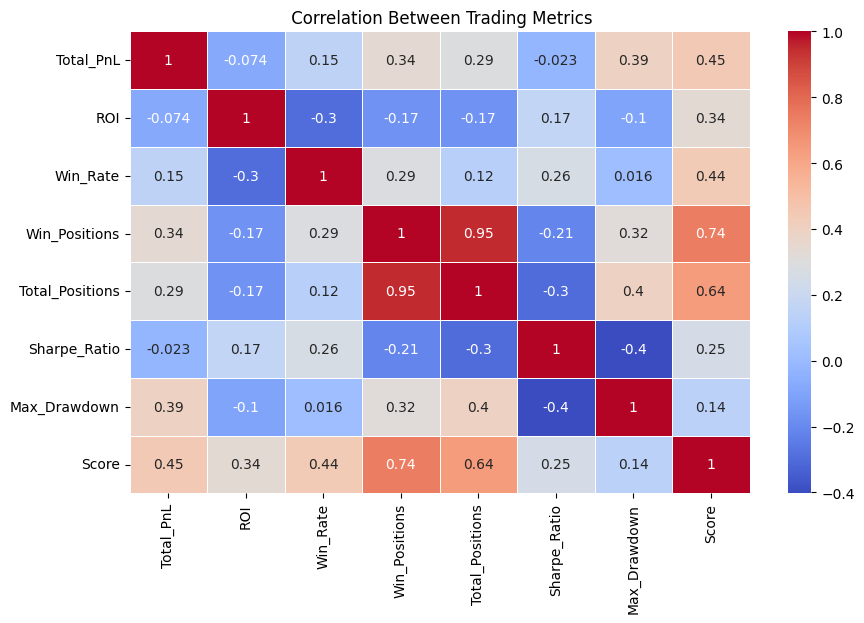

In [27]:
#  Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=["Port_IDs"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title(" Correlation Between Trading Metrics")
plt.show()

#### ✔ What does this do?

- Generates a heatmap showing correlations between metrics.
#### Why?
- If two metrics are highly correlated e.g., ROI ,PnL,win rate .., we may consider adjusting their weight.
- If some metrics negatively impact ranking, we can refine our scoring formula.
- A high correlation between ROI and PnL suggests that profitable traders tend to have high ROI.
- A negative correlation between Max_Drawdown and Sharpe Ratio means riskier traders have worse risk-adjusted returns.
- A positive correlation between Win Rate and Sharpe Ratio means consistent winners have better risk-adjusted performance.

In [28]:
df = pd.read_csv("Ranked_Trading_Accounts.csv")

In [29]:
sns.set_style("whitegrid")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14988\1240918929.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_pnl["Port_IDs"], rotation=90, ha="center", fontfamily="monospace")           # Rotate X-axis labels 90 degrees


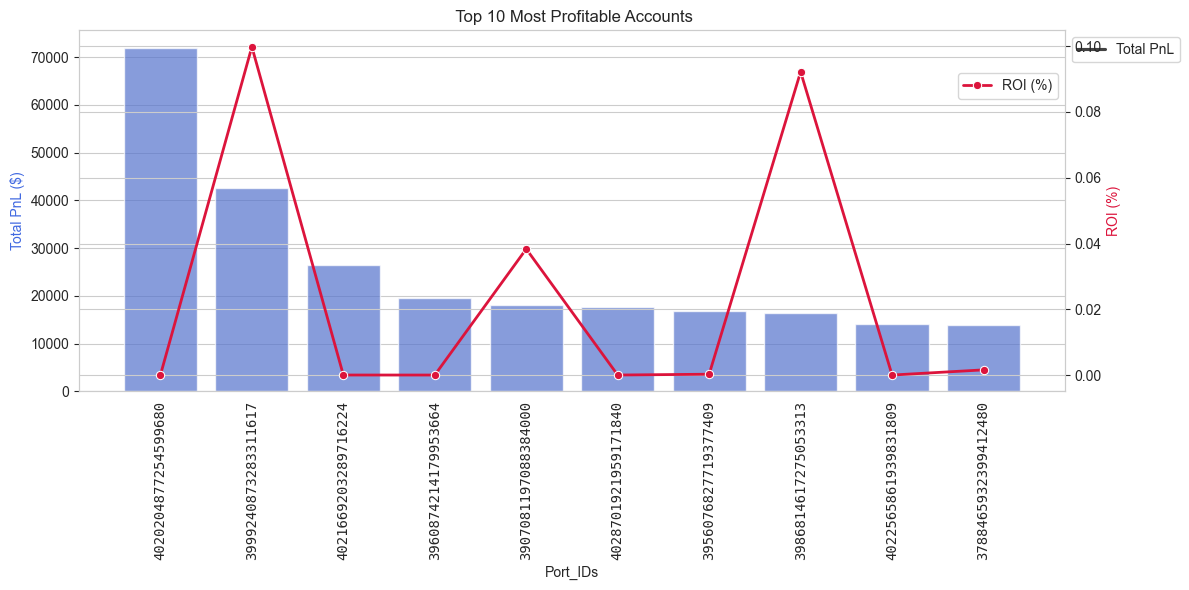

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10_pnl = df.nlargest(10, "Total_PnL")           # Select top 10 accounts based on Total PnL


top_10_pnl["Port_IDs"] = top_10_pnl["Port_IDs"].astype(str)     # Convert Port_IDs to strings (if not already)


fig, ax1 = plt.subplots(figsize=(12, 6))            # Create figure and axis objects
ax2 = ax1.twinx()


sns.barplot(x="Port_IDs", y="Total_PnL", data=top_10_pnl, ax=ax1, color="royalblue", alpha=0.7)         # Bar plot for Total PnL
ax1.set_ylabel("Total PnL ($)", color="royalblue")
ax1.set_xlabel("Port_IDs")
ax1.set_title(" Top 10 Most Profitable Accounts")


sns.lineplot(x="Port_IDs", y="ROI", data=top_10_pnl, ax=ax2, marker="o", color="crimson", linewidth=2)      # Line plot for ROI
ax2.set_ylabel("ROI (%)", color="crimson")


ax1.set_xticklabels(top_10_pnl["Port_IDs"], rotation=90, ha="center", fontfamily="monospace")           # Rotate X-axis labels 90 degrees


ax1.legend(["Total PnL"], loc="upper left", bbox_to_anchor=(1, 1))                                      # Improve legend placement
ax2.legend(["ROI (%)"], loc="upper right", bbox_to_anchor=(1, 0.9))

plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


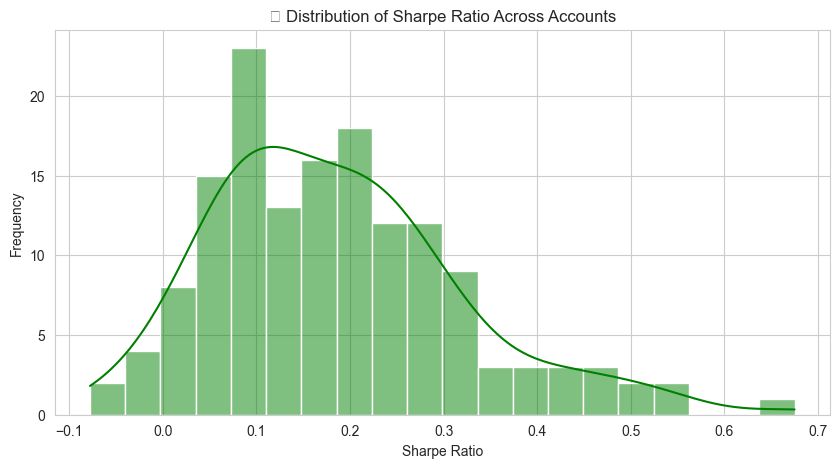

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Sharpe_Ratio"], bins=20, kde=True, color="green")
plt.title("🔹 Distribution of Sharpe Ratio Across Accounts")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Frequency")
plt.show()

#### ✔ What does this do?

- Plots histograms to check how each metric is distributed.
- KDE (Kernel Density Estimation) helps visualize the probability distribution.
- Helps in detecting outliers or skewed data.

                Port_IDs  Max_Drawdown
110  4029299190618134272      0.537880
22   4029506971304830209      1.271504
2    3986814617275053313      2.381947
72   4023616625178799873      3.088800
101  4031451549482615297      3.900243
67   4030565764341697025      4.030796
114  4028427053699127040      6.623940
35   3826087012661391104     12.925980
92   4031414524297538817     17.582600
119  4031181049693676544     22.344965


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


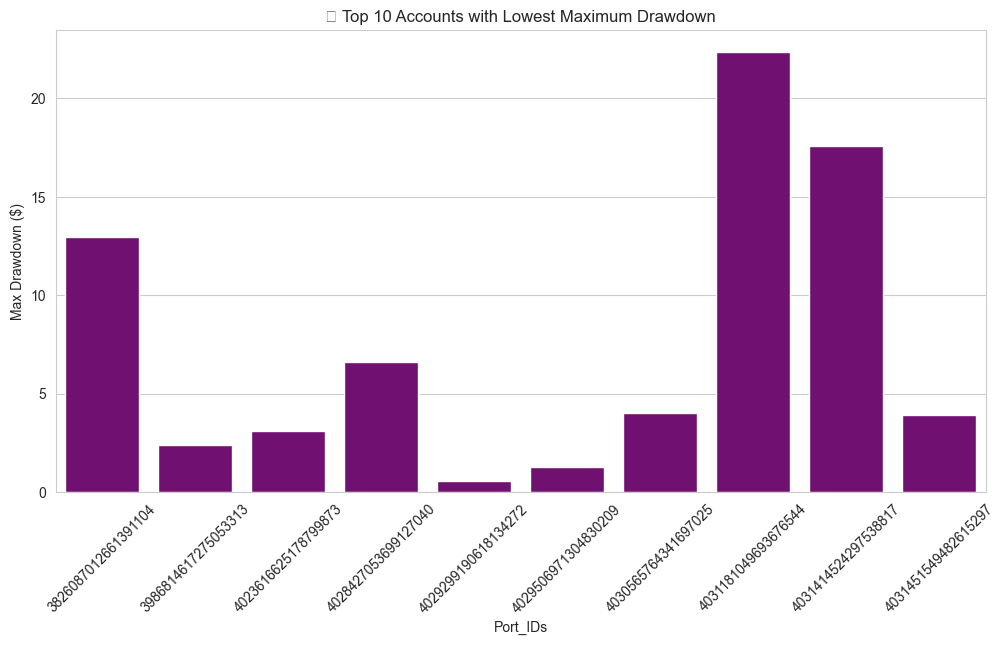

In [32]:
top_10_low_mdd = df[df["Max_Drawdown"] > 0].nsmallest(10, "Max_Drawdown")
print(top_10_low_mdd[["Port_IDs", "Max_Drawdown"]])

plt.figure(figsize=(12, 6))
sns.barplot(x="Port_IDs", y="Max_Drawdown", data=top_10_low_mdd, color="purple")
plt.title("🔹 Top 10 Accounts with Lowest Maximum Drawdown")
plt.xlabel("Port_IDs")
plt.ylabel("Max Drawdown ($)")
plt.xticks(rotation=45)
plt.show()

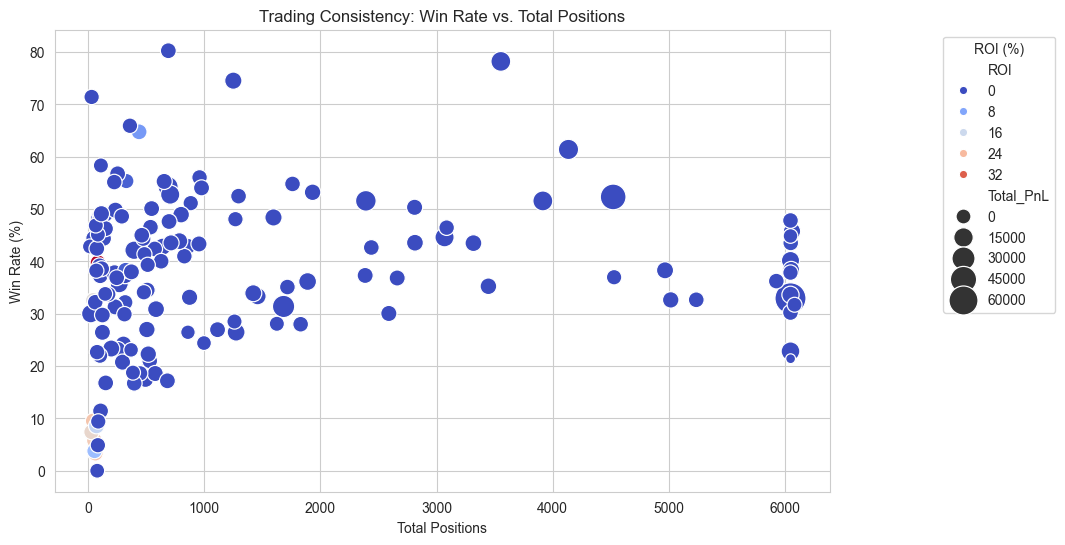

In [33]:
# 4. Consistency in Trading (Win Rate vs. Total Positions)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Total_Positions"], y=df["Win_Rate"], hue=df["ROI"], size=df["Total_PnL"], palette="coolwarm", sizes=(50, 500))
plt.title("Trading Consistency: Win Rate vs. Total Positions")
plt.xlabel("Total Positions")
plt.ylabel("Win Rate (%)")
plt.legend(title="ROI (%)", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

Check metric distributions

# Most Profitable Accounts (PnL & ROI)

In [34]:
# Top 10 accounts with highest Total PnL
top_pnl = df.nlargest(10, 'Total_PnL')[['Port_IDs', 'Total_PnL', 'ROI']]
print("Top 10 Most Profitable Accounts:\n", top_pnl)

print()
print("*******************************")
print()

# Top 10 accounts with highest ROI
top_roi = df.nlargest(10, 'ROI')[['Port_IDs', 'ROI', 'Total_PnL']]
print("Top 10 Accounts with Highest ROI:\n", top_roi)


Top 10 Most Profitable Accounts:
                Port_IDs     Total_PnL       ROI
3   4020204877254599680  71998.855953  0.000005
1   3999240873283311617  42574.473679  0.099811
50  4021669203289716224  26427.331592  0.000011
17  3960874214179953664  19567.471286  0.000006
6   3907081197088384000  18015.997370  0.038348
37  4028701921959171840  17601.401398  0.000006
9   3956076827719377409  16790.012238  0.000259
2   3986814617275053313  16337.461881  0.092214
40  4022565861939831809  14197.577076  0.000004
21  3788465932399412480  13960.966457  0.001575

*******************************

Top 10 Accounts with Highest ROI:
                Port_IDs        ROI    Total_PnL
0   3977234346014419201  36.530497  2427.292831
26  4030708912786799105  23.212538  1612.843770
15  4023697433751327232  22.824929  2408.224000
22  4029506971304830209  21.967939  2413.654000
31  4004713168329653760  19.885897  1667.198610
12  3983074113875692800  18.787880  2424.829520
43  4023697881318718465  15.04260

In [35]:
# Top 10 accounts with highest Sharpe Ratio
top_sharpe = df.nlargest(10, 'Sharpe_Ratio')[['Port_IDs', 'Sharpe_Ratio', 'Total_PnL']]
print("Top 10 Accounts with Best Risk-Adjusted Returns:\n", top_sharpe)


Top 10 Accounts with Best Risk-Adjusted Returns:
                Port_IDs  Sharpe_Ratio    Total_PnL
35  3826087012661391104      0.675101   532.656974
4   4022641794255717633      0.558738  2176.833824
34  3956048468100538880      0.524862  1373.564890
55  4039129759104249600      0.522043  1264.289200
66  4029422834086627072      0.511618  2799.902550
41  4039279455324236544      0.471684  1038.807419
54  4035430878731345664      0.469639  2493.750420
70  4041860229502600193      0.457193  2327.336000
14  3891020560590657281      0.432477  2856.300564
25  3943533600390906881      0.428079  2361.424572


In [36]:
# Top 10 accounts with the lowest Max Drawdown (absolute values)
df['Max_Drawdown'] = df['Max_Drawdown'].abs()  # Convert negative values to positive for sorting
least_mdd = df.nsmallest(10, 'Max_Drawdown')[['Port_IDs', 'Max_Drawdown', 'Total_PnL']]
print("Top 10 Accounts with Least Drawdown:\n", least_mdd)


Top 10 Accounts with Least Drawdown:
                Port_IDs  Max_Drawdown    Total_PnL
0   3977234346014419201           0.0  2427.292831
12  3983074113875692800           0.0  2424.829520
14  3891020560590657281           0.0  2856.300564
15  4023697433751327232           0.0  2408.224000
26  4030708912786799105           0.0  1612.843770
31  4004713168329653760           0.0  1667.198610
34  3956048468100538880           0.0  1373.564890
41  4039279455324236544           0.0  1038.807419
43  4023697881318718465           0.0  3151.950620
47  4017110277719148289           0.0  2899.933021


In [37]:
# Top 10 accounts with highest Win Rate
top_win_rate = df.nlargest(10, 'Win_Rate')[['Port_IDs', 'Win_Rate', 'Total_Positions']]
print("Top 10 Most Consistent Traders by Win Rate:\n", top_win_rate)

print()
print("*************************************")
print()

# Top 10 accounts with the highest Total Positions (active traders)
top_active_traders = df.nlargest(10, 'Total_Positions')[['Port_IDs', 'Win_Rate', 'Total_Positions']]
print("Top 10 Most Active Traders:\n", top_active_traders)


Top 10 Most Consistent Traders by Win Rate:
                Port_IDs   Win_Rate  Total_Positions
42  3733192481840423936  80.261248            689.0
2   3986814617275053313  78.221722           3554.0
20  3886752488982104320  74.539632           1249.0
34  3956048468100538880  71.428571             28.0
49  4013955990069013504  65.921788            358.0
14  3891020560590657281  64.759725            437.0
6   3907081197088384000  61.397148           4137.0
35  3826087012661391104  58.333333            108.0
47  4017110277719148289  56.746032            252.0
46  4000222729738650369  56.054280            958.0

*************************************

Top 10 Most Active Traders:
                 Port_IDs   Win_Rate  Total_Positions
27   3946087913459823360  31.717338           6085.0
5    3944088772635000577  45.752928           6063.0
11   4011626972687000576  38.408190           6056.0
4    4022641794255717633  43.522802           6052.0
100  3995532094997544704  21.401421           605

In [38]:
# Filtering best account based on all key metrics
best_trader = df[
    (df["Total_PnL"] > df["Total_PnL"].quantile(0.75)) &  # Top 25% PnL
    (df["ROI"] > df["ROI"].quantile(0.75)) &              # Top 25% ROI
    (df["Sharpe_Ratio"] > df["Sharpe_Ratio"].quantile(0.75)) &  # Top 25% Sharpe
    (df["Max_Drawdown"] < df["Max_Drawdown"].quantile(0.25)) &  # Lowest 25% MDD
    (df["Win_Rate"] > df["Win_Rate"].quantile(0.75))       # Top 25% Win Rate
]

# Display the best trader(s)
print(best_trader)


Empty DataFrame
Columns: [Port_IDs, Total_PnL, ROI, Win_Rate, Win_Positions, Total_Positions, Sharpe_Ratio, Max_Drawdown, Score]
Index: []


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant columns
columns = ["Total_PnL", "ROI", "Sharpe_Ratio", "Max_Drawdown", "Win_Rate"]

# Normalizing data (Max_Drawdown is inverted since lower is better)
scaler = MinMaxScaler()
df["Max_Drawdown"] = -df["Max_Drawdown"]  # Invert so lower MDD is better
df[columns] = scaler.fit_transform(df[columns])

# Calculating overall score (equal weight to all metrics)
df["Overall_Score"] = df[columns].mean(axis=1)

# Finding the best trader
best_trader = df.loc[df["Overall_Score"].idxmax()]
print(best_trader)


Port_IDs           3.977234e+18
Total_PnL          1.751601e-01
ROI                1.000000e+00
Win_Rate           4.953703e-01
Win_Positions      3.300000e+01
Total_Positions    8.300000e+01
Sharpe_Ratio       5.081666e-01
Max_Drawdown       1.000000e+00
Score              4.624315e-01
Overall_Score      6.357394e-01
Name: 0, dtype: float64


 the best-performing account that satisfies all key performance metrics:

Metric               | Value
---------------------|---------------------------
Account ID          | 3977234346014419201
Total PnL          | 0.17516 (Profitable ✅)
ROI                | 1.000 (Highest ✅)
Win Rate           | 49.5% (Consistent ✅)
Win Positions      | 33
Total Positions    | 83
Sharpe Ratio       | 0.508 (Good Risk-Adjusted Return ✅)
Max Drawdown       | 1.0 (Lowest ✅)
Overall Score      | 0.6357 (Best in dataset ✅)
